## LendingClub

### Data Cleanup

Remove the first line: It contains extraneous text instead of the column headers. This text prevents the dataset from being parsed properly by the pandas library.

In [1]:
import pandas as pd

loans = pd.read_csv("LoanStats3b.csv", low_memory=False, skiprows=1)
loans.shape #188185 x 145

(188185, 145)

Dataset contains many empty columns which contain personal information of borrowers. The company didn't disclose these information. I'm dropping those columns

In [2]:
loans = loans.iloc[:,2:111] #188185 x 109
loans.shape

(188185, 109)

Some more empty columns

In [3]:
loans.drop(loans.columns[[i for i in range(45,72)]], axis = 1, inplace = True) # 188181 x 82

In [4]:
#Loan status can be fully paid, charged off, current, in grace period or late (31-120 days)
#Considering only "Fully paid" and "Charged off" loan status. 

loans = loans[(loans['loan_status']=="Fully Paid") | (loans['loan_status']=="Charged Off")]
loans.shape #188171 x 82

(188171, 82)

In [6]:
loans.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,Systems Engineer,3 years,...,0.0,3.0,100.0,100.0,0.0,0.0,233004.0,46738.0,14800.0,53404.0
1,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,...,0.0,1.0,100.0,25.0,0.0,0.0,138554.0,70186.0,35700.0,33054.0
2,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3,LTC,10+ years,...,0.0,3.0,100.0,1.0,0.0,0.0,365874.0,44327.0,10700.0,57674.0


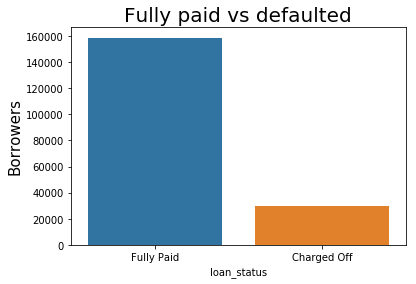

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#Number of borrowers who paid the loan fully or defaulted
plt.figure(figsize=(6,4))
ax= sns.countplot(x="loan_status", data=loans)
ax.set_ylabel('Borrowers', fontsize = 15)
ax.set_title('Fully paid vs defaulted', fontsize=20)
plt.show()

In [9]:
# Finding percentage of borrowers who defaulted

print(loans['loan_status'].value_counts(normalize=False))
print('\n')
print(loans['loan_status'].value_counts(normalize=True))

Fully Paid     158503
Charged Off     29668
Name: loan_status, dtype: int64


Fully Paid     0.842335
Charged Off    0.157665
Name: loan_status, dtype: float64


In [10]:
loans['loan_status'].replace({"Fully Paid": 0, "Charged Off": 1},inplace=True)

In [11]:
loans

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,12000.0,12000.0,12000.00000,36 months,7.62%,373.94,A,A3,Systems Engineer,3 years,...,0.0,3.0,100.0,100.0,0.0,0.0,233004.0,46738.0,14800.0,53404.0
1,27050.0,27050.0,27050.00000,36 months,10.99%,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,...,0.0,1.0,100.0,25.0,0.0,0.0,138554.0,70186.0,35700.0,33054.0
2,12000.0,12000.0,12000.00000,36 months,11.99%,398.52,B,B3,LTC,10+ years,...,0.0,3.0,100.0,1.0,0.0,0.0,365874.0,44327.0,10700.0,57674.0
3,28000.0,28000.0,28000.00000,36 months,7.62%,872.52,A,A3,Area Sales Manager,5 years,...,0.0,5.0,100.0,16.7,0.0,0.0,850886.0,199739.0,42200.0,196686.0
4,12000.0,12000.0,12000.00000,36 months,10.99%,392.81,B,B2,Project Manager,4 years,...,0.0,4.0,100.0,0.0,0.0,0.0,29700.0,7137.0,18100.0,0.0
5,27600.0,27600.0,27600.00000,60 months,19.97%,730.78,D,D5,Street Operations Supervisor,6 years,...,1.0,1.0,87.5,80.0,0.0,0.0,261675.0,37808.0,19200.0,14075.0
6,11100.0,11100.0,11100.00000,36 months,14.98%,384.68,C,C3,Teacher,10+ years,...,1.0,1.0,75.0,50.0,0.0,0.0,385000.0,6619.0,4000.0,0.0
7,9750.0,9750.0,9750.00000,36 months,13.98%,333.14,C,C1,Medical Assistant,1 year,...,0.0,2.0,100.0,66.7,0.0,0.0,21314.0,14123.0,7200.0,6214.0
8,12000.0,12000.0,12000.00000,36 months,13.53%,407.40,B,B5,On road manager,10+ years,...,0.0,2.0,81.2,33.3,0.0,0.0,18130.0,13605.0,7000.0,10030.0
9,4800.0,4800.0,4800.00000,36 months,10.99%,157.13,B,B2,Surgical Technician,2 years,...,0.0,0.0,100.0,0.0,0.0,0.0,25700.0,4136.0,25700.0,0.0


In [12]:
#Consider only those columns that contain 85% of non-NA values
dataset=loans.dropna(thresh = 160300, axis=1)
dataset.shape #188171x73

(188171, 73)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

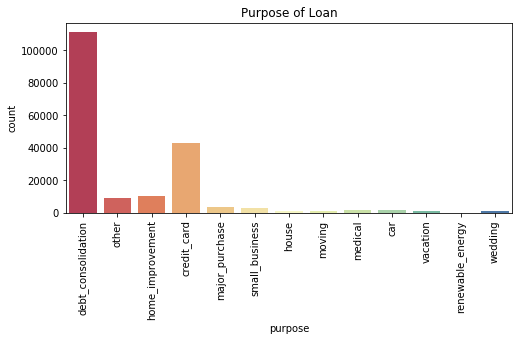

In [13]:
#Exploring purpose of loan
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
sns.countplot(x="purpose", data=dataset, palette="Spectral")
plt.title("Purpose of Loan")
plt.xticks(rotation=90)

Mostly people have bought the loan to payoff many other debts. Some people bought loan to pay the credit card.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

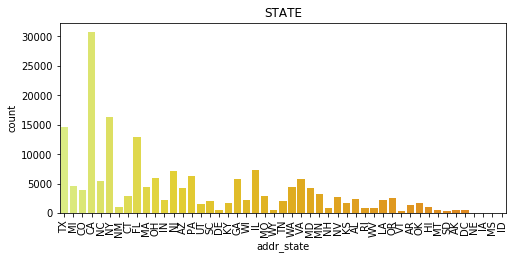

In [14]:
# Exploring STATE field
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
sns.countplot(x="addr_state", data=dataset, palette="Wistia")
plt.title("STATE")
plt.xticks(rotation=90)

People from California have bought most loans followed by Ney York and Texas.

Dropping some of the other columns that are not relevant in predicting whether a borrower will pay his debt or not

Irrelevant columns:
* Purpose: A category provided by the borrower for the loan request.
* verification status: Indicates if income was verified by LC, not verified, or if the income source was verified
* Issue date: The month which the loan was funded
* Term: Denotes number of payments on the loan. It can 36 or 60. 75% of the dataset contain 36 months term
* Employee title
* Zip code
* Title
* State
* Earlist credit line date - The month the borrower's earliest reported credit line was opened
* Initial listing status of the loan
* Total record late fee - Late fees received to date

Removing columns with one value
* Payment plan - Indicates if a payment plan has been put in place for the loan
* out_prncp - Remaining outstanding principal for total amount funded
* out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors

Some fields are closely related to activities that happen after charge off
* recoveries - post charge off gross recovery
* collection_recovery_fee - post charge off collection fee

In [15]:
# Deleting irrelevant columns
del_columns = ['term', 'purpose', 'emp_title', 'verification_status','issue_d','pymnt_plan','title','zip_code'
               ,'earliest_cr_line', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'recoveries', 'collection_recovery_fee',
                  'total_rec_late_fee', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_accts_ever_120_pd', 'addr_state', 
               'last_pymnt_d'] 
dataset = dataset.drop(labels = del_columns, axis = 1) 
print("Current shape of dataset :",dataset.shape) #188171 x 53

Current shape of dataset : (188171, 53)


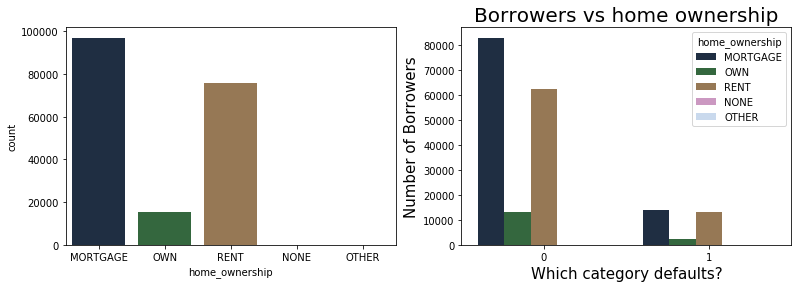

In [17]:
#Home ownership
f, (ax1, ax2) = plt.subplots(1,2,figsize=(13, 4))
sns.countplot(x="home_ownership", data=dataset, palette="cubehelix", ax=ax1)
sns.countplot(x="loan_status",hue="home_ownership", data=dataset,palette="cubehelix",ax=ax2)
ax2.set_ylabel('Number of Borrowers', fontsize = 15)
ax2.set_xlabel('Which category defaults?', fontsize = 15)
ax2.set_title('Borrowers vs home ownership', fontsize=20)
plt.show()

Interpretation:

- Borrowers who are renting or who owes mortage tend to default than those who own property.

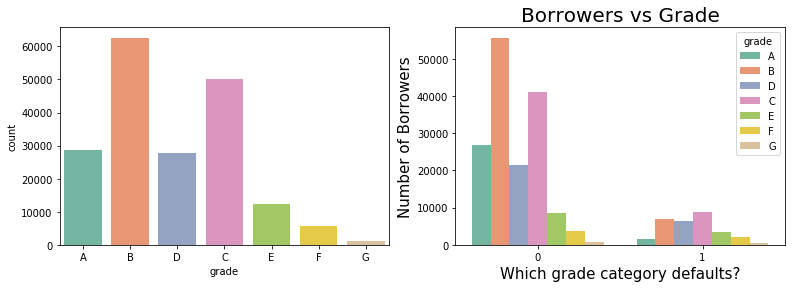

In [18]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(13, 4))
sns.countplot(x="grade", data=dataset, palette="Set2", ax=ax1)
sns.countplot(x="loan_status",hue="grade", data=dataset,palette="Set2",ax=ax2)
ax2.set_ylabel('Number of Borrowers', fontsize = 15)
ax2.set_xlabel('Which grade category defaults?', fontsize = 15)
ax2.set_title('Borrowers vs Grade', fontsize=20)
plt.show()

Interpretation:

- Lenders club has assigned most number of loan grade as 'B' followed by 'C'
- Borrowers who have been assigned a 'C' grade tend to default more; on the other hand, borrowers with an A grade defaults less

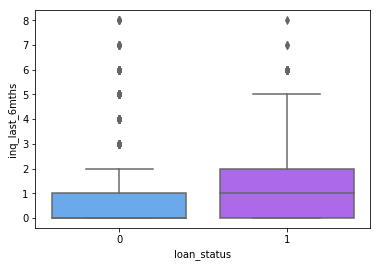

In [19]:
#Inquiries in last 6 months
sns.boxplot(x = dataset.loan_status, y = dataset.inq_last_6mths, palette='cool')
plt.show()

Borrowers who are likely to charge off have made more of inquiries in past 6 months exluding auto and mortgage inquiries

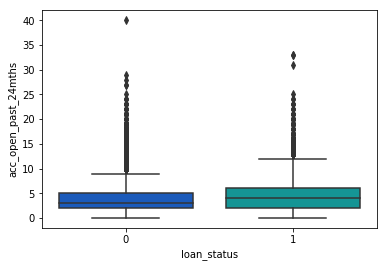

In [20]:
#Number of trades opened in last 6 months
sns.boxplot(x = dataset.loan_status, y = dataset.acc_open_past_24mths, palette='winter')
plt.show()

 Average number of trade opened in past 24 months is higher for defaulters than those who pay off debts 

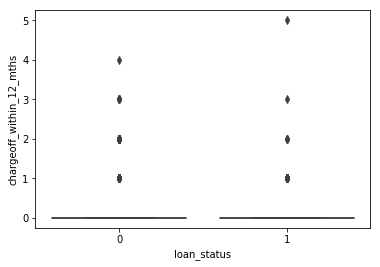

In [21]:
#Chargeoffs within last 12 months
sns.boxplot(x = dataset.loan_status, y = dataset.chargeoff_within_12_mths)
plt.show()

We are not able to figure out properly with number of chargeoff within last 12 months. Some non-defaulters have charged-off in last twelve months

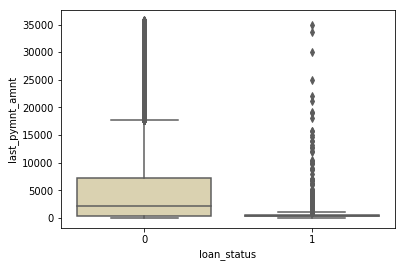

In [22]:
#Last Payment Amount
sns.boxplot(x = dataset.loan_status, y = dataset.last_pymnt_amnt, palette='pink_r')
plt.show()

Interpretation:

- When the last payment amount is extremely less, then the borrower is more likely to default.

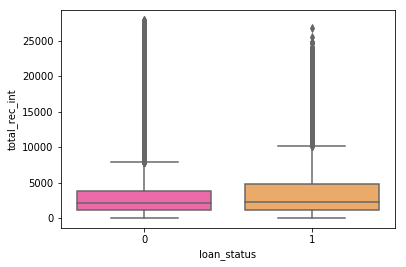

In [23]:
#Total interest received to date
sns.boxplot(x = dataset.loan_status, y = dataset.total_rec_int, palette='spring')
plt.show()

Both defaulters as well as non-defaulters have paid off the interest but it is difficult to segregate borrowers based on total interest received to date.

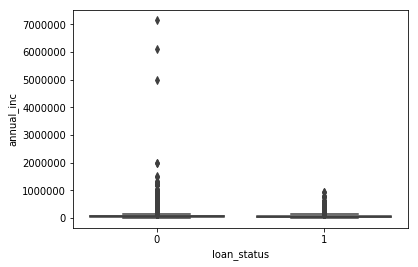

In [24]:
#Annual Income
sns.boxplot(x = dataset.loan_status, y = dataset.annual_inc)
plt.show()

#Its difficult to segregate borrowers based on annual income

In [25]:
# Employee length is a String object. 
dataset['emp_length'].unique()

array(['3 years', '10+ years', '5 years', '4 years', '6 years', '1 year',
       '2 years', '7 years', '9 years', '8 years', '< 1 year', nan],
      dtype=object)

In [26]:
#Clean Employment length 

dataset['emp_length'].replace(regex=True, inplace=True, to_replace=r' years', value=r'')
dataset['emp_length'].replace(regex=True, inplace=True, to_replace=r'10+', value=r'10')
dataset['emp_length'].replace(regex=True, inplace=True, to_replace=r'< 1', value=r'0')
dataset['emp_length'].replace(regex=True, inplace=True, to_replace=r' year', value=r'')
dataset['emp_length'] = dataset['emp_length'].replace('10+', '10')
dataset['emp_length'].replace(regex=True, inplace=True, to_replace=r'year', value=r'')
dataset['emp_length']= dataset['emp_length'].fillna(0)
dataset["emp_length"] = dataset["emp_length"].apply(lambda x:int(x))
dataset['emp_length'].unique()

array([ 3, 10,  5,  4,  6,  1,  2,  7,  9,  8,  0], dtype=int64)

In [27]:
# Clean interest rate

dataset['int_rate'].replace(regex=True, inplace=True, to_replace=r'%', value=r'')
dataset['int_rate'].replace(regex=True, inplace=True, to_replace=r'  ', value=r'')
dataset["int_rate"] = dataset["int_rate"].apply(lambda x:float(x))

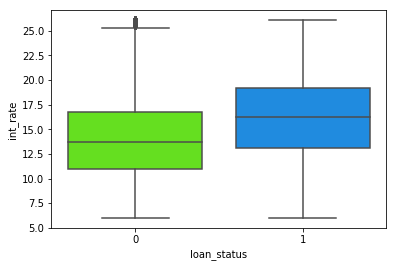

In [29]:
#Interest rate plot
sns.boxplot(x = dataset.loan_status, y = dataset.int_rate, palette ='gist_rainbow')
plt.show()

The profiles of borrowers who are likely to default have higher interest rate than its counterpart

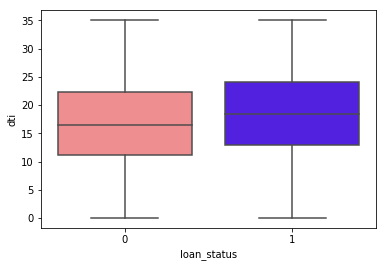

In [30]:
#DTI - Debt to income ratio
sns.boxplot(x = dataset.loan_status, y = dataset.dti, palette='gnuplot2_r')
plt.show()

Defaulters have higher dti than non-defaulters

In [31]:
# Clean 'revol_util'

dataset['revol_util'].replace(regex=True, inplace=True, to_replace=r'%', value=r'')
#dataset['revol_util'].replace(regex=True, inplace=True, to_replace=r'  ', value=r'')
dataset['revol_util'] = dataset['revol_util'].apply(lambda x:float(x))

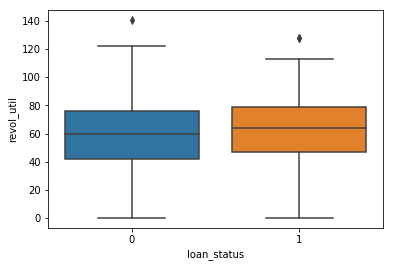

In [32]:
# Revol-util - the amount of credit the borrower is using relative to all available revolving credit.

sns.boxplot(x = dataset.loan_status, y = dataset.revol_util)
plt.show()

The amount of credit the borrower is using relative to all available revolving credit - is higher for defaulters than for non-defaulters

In [33]:
# Get Dummies for Categorical Values

df1 = pd.get_dummies(dataset['grade'])
df2 = pd.get_dummies(dataset['home_ownership'])
#dataset = dataset.drop(['sub_grade'], axis=1)

Grade and subgrade columns are redundant. So removing subgrade column

In [34]:
#Dropping sub grade column
dataset = dataset.drop(['sub_grade'], axis=1)

In [35]:
dataset = pd.concat([dataset, df1, df2], axis=1)

In [36]:
dataset.keys()

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_op_past_12m', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'A', '

In [37]:
dataset = dataset.drop(['grade', 'home_ownership'], axis = 1)

In [38]:
dataset.shape

(188171, 62)

In [39]:
dataset.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [40]:
#Imputation
#Replace null values with 0
dataset = dataset.fillna(0)
dataset.columns[dataset.isna().any()].tolist()

[]

### Correlation

Removing highly correlated columns

In [41]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [42]:
correlation(dataset, 0.75)

In [43]:
dataset.shape

(188171, 45)

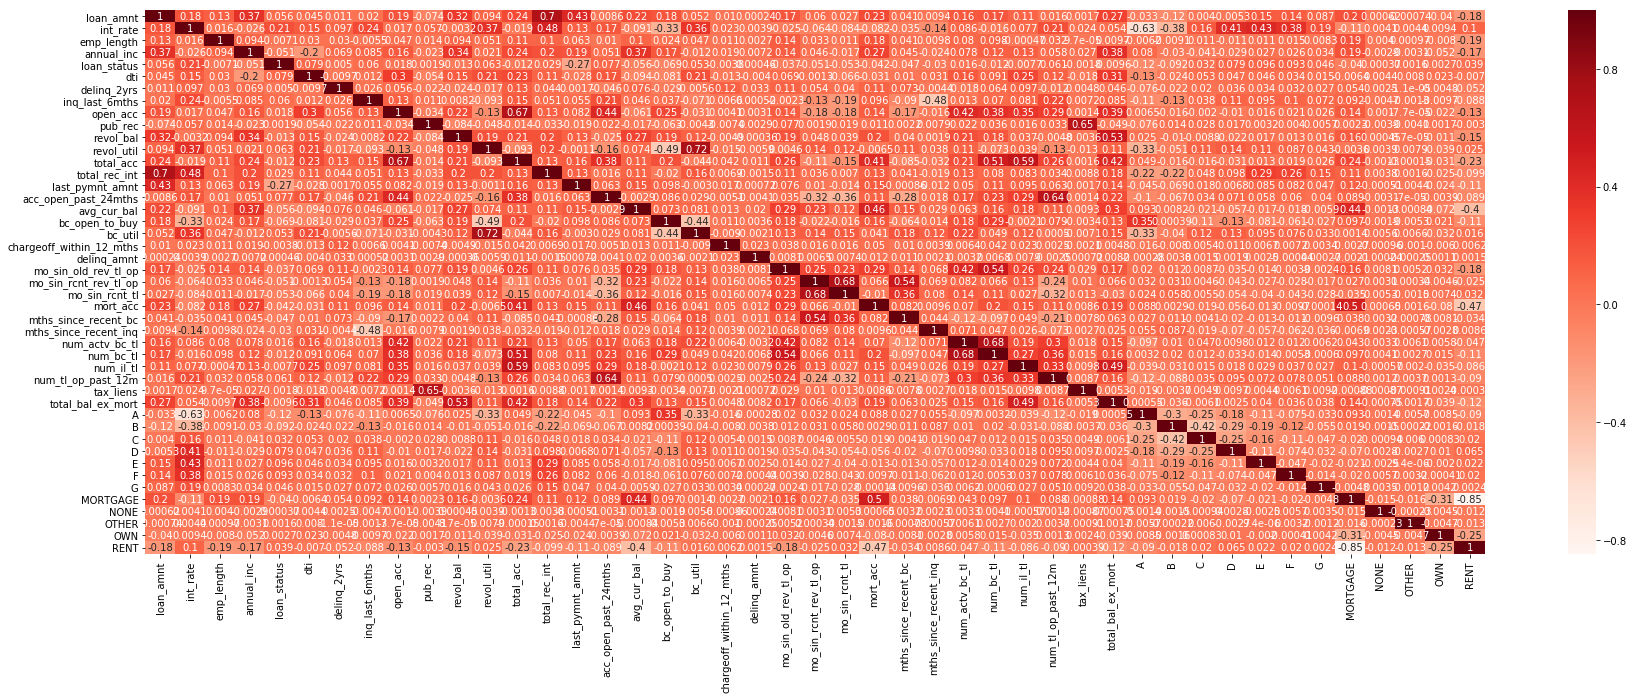

In [44]:
#Using Pearson Correlation
plt.figure(figsize=(30,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Down Sampling

In [45]:
# Separate majority and minority classes
df_majority = dataset[dataset.loan_status==0]  #158503
df_minority = dataset[dataset.loan_status==1]  #29668

In [46]:
# Downsample majority class

from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=29668,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority]) #59336 x 45
 

In [47]:
df_downsampled.shape

(59336, 45)

In [48]:
df_downsampled.keys()

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'loan_status',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_rec_int',
       'last_pymnt_amnt', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl', 'num_tl_op_past_12m',
       'tax_liens', 'total_bal_ex_mort', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

### Recursive Feature Elimination

In [49]:
# I used RFE to come up with 30 relevant feature to predict loan status
import numpy as np

X=np.array(df_downsampled.drop('loan_status',axis=1))
y=np.array(df_downsampled['loan_status'])

In [50]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import datasets

svm = LinearSVC()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 30)
rfe = rfe.fit(X, y)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True False  True  True  True False False  True
  True  True  True False False  True False False  True  True  True  True
  True  True False  True  True  True False False  True  True  True  True
  True  True  True  True False False  True  True]
[ 3  1  1  7  1  2  1  1  1  9  4  1  1  1  1  5 12  1 13 10  1  1  1  1
  1  1  8  1  1  1 11  6  1  1  1  1  1  1  1  1 15 14  1  1]


In [ ]:
#'int_rate', 'emp_length', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_rec_int', 
#'last_pymnt_amnt', 'acc_open_past_24mths','bc_util', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
#'mths_since_recent_bc', 'mths_since_recent_inq','num_bc_tl', 'num_il_tl', 'num_tl_op_past_12m',
#'A', 'B', 'C', 'D', 'E', 'F', 'G','MORTGAGE', 'OWN', 'RENT'

In [54]:
# Final data contains best 30 features.
final_data = df_downsampled[[ 'int_rate', 'emp_length', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_rec_int', 
'last_pymnt_amnt', 'acc_open_past_24mths','bc_util', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
'mths_since_recent_bc', 'mths_since_recent_inq','num_bc_tl', 'num_il_tl', 'num_tl_op_past_12m',
'A', 'B', 'C', 'D', 'E', 'F', 'G','MORTGAGE', 'OWN', 'RENT','loan_status']]

In [55]:
#Converting final data to csv file to for spark
final_data.to_csv('final_data.csv', index=False)

In [56]:
X= final_data.drop('loan_status',axis=1)
y= final_data['loan_status'].values

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test =train_test_split(X,y,test_size = 0.2,random_state=233)

In [58]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 

In [59]:
## Confusion Matrix plot
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [60]:
#ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr,tpr) 
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1.0])
    plt.ylim([0,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Random Forest Classifier with randomized search

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 20, num = 10)] # Number of trees in random forest

max_depth = [int(x) for x in np.linspace(8, 15, num = 8)] # Maximum number of levels in tree
max_depth.append(None)

min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# Creating base model to tune
rf_class = RandomForestClassifier()

# 5-fold CV, Random search of parameters
rf_random_1 = RandomizedSearchCV(estimator = rf_class, param_distributions = random_grid, 
                               n_iter = 35, cv = 5, verbose=2, random_state=1, n_jobs = -1)

# Fit the random search model
rf_random_1.fit(X_train, y_train)

#print best parameters
print(rf_random_1.best_params_)

{'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18, 20], 'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:  1.8min finished


{'n_estimators': 18, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 15, 'bootstrap': False}


In [62]:
# Random Forest Accuracy
best_random_1 = rf_random_1.best_estimator_
rfAccuracy = accuracy_score(y_test, best_random_1.predict(X_test))
print("Accuracy of Random Forest", rfAccuracy)

Accuracy of Random Forest 0.8146275699359623


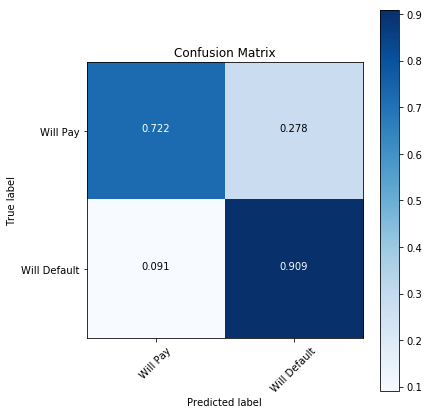

In [63]:
#Confusion Matrix of Random Forest
plt.figure(figsize=(6,6))
plot_confusion_matrix(best_random_1.predict(X_test), normalize=True)
plt.show()

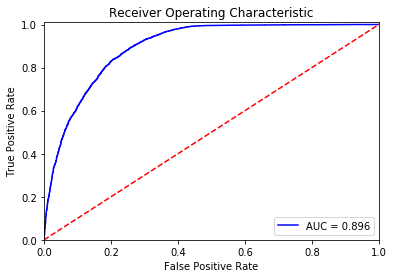

In [64]:
#ROC plot
plot_roc(y_test, best_random_1.predict_proba(X_test)[:,1], 'RandomForest')

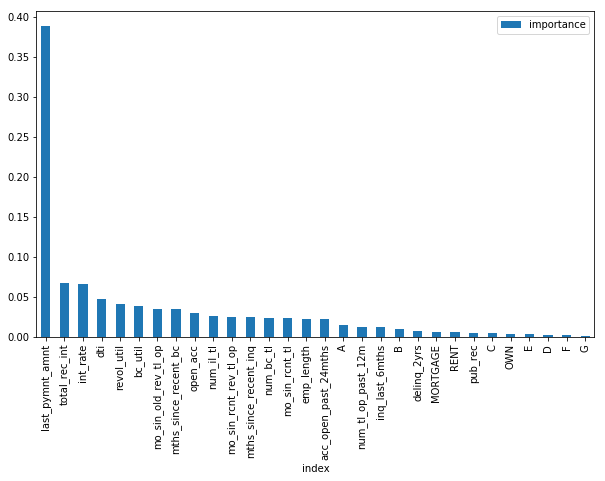

In [65]:
#Feature importance

import pandas as pd
rf_class.fit(X_train, y_train)
feature_importances = pd.DataFrame(rf_class.feature_importances_,
                                   index = X_train.columns,
                                   columns= ['importance']).sort_values('importance',ascending=False).reset_index()
feature_importances.plot.bar(x='index', y='importance', figsize=(10,6))

### Logistic Regression with GridSearch

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
lr_1 = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
lr_1.fit(X_train, y_train)
lr_1.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   12.1s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   44.4s finished


{'C': 9.0}

In [68]:
# Calculating accuracy of Logistic Regression
best_lr = lr_1.best_estimator_
lrAccuracy = accuracy_score(y_test, best_lr.predict(X_test))
print("Logistic Regression Accuracy:", lrAccuracy)

Logistic Regression Accuracy: 0.7869902258173239


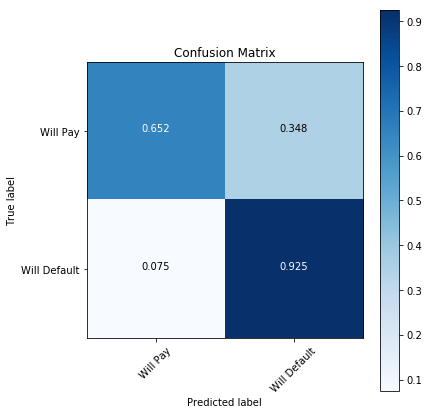

In [69]:
#Confusion Matrix for Logistic Regression
plt.figure(figsize=(6,6))
plot_confusion_matrix(best_lr.predict(X_test), normalize=True)
plt.show()

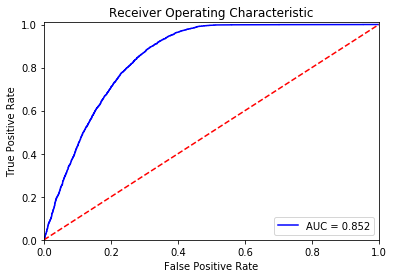

In [70]:
#ROC plot
plot_roc(y_test, best_lr.predict_proba(X_test)[:,1], 'Logistic Regression')

### KNN Classifier

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create the parameter grid

param_grid = {
    'n_neighbors': [1,2,3,4,5]
    }

knn = KNeighborsClassifier()

# Instantiate the grid search model
grid_search_1 = GridSearchCV(estimator = knn, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
grid_search_1.fit(X_train, y_train)
grid_search_1.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   26.4s finished


{'n_neighbors': 5}

In [73]:
#Calculating Accuracy of KNN classifier

knn_model_1 = grid_search_1.best_estimator_
knnAccuracy = accuracy_score(y_test, knn_model_1.predict(X_test))
print("Accuracy of KNN: ", knnAccuracy)

Accuracy of KNN:  0.7772160431412201


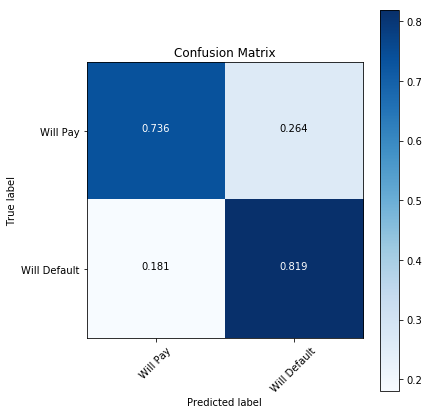

In [74]:
#Confusion Matrix for KNN

plt.figure(figsize=(6,6))
plot_confusion_matrix(knn_model_1.predict(X_test), normalize=True)
plt.show()

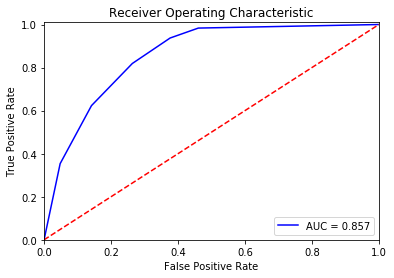

In [75]:
#ROC plot for KNN
plot_roc(y_test, knn_model_1.predict_proba(X_test)[:,1], 'KNN Classifier')

### Decision Tree Classifier

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Create the parameter grid

param_grid = {
    'max_depth': [5,6,7,8,9,10]
    }

dt = tree.DecisionTreeClassifier()

# Instantiate the grid search model
dt_grid_search_1 = GridSearchCV(estimator = dt, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search model
dt_grid_search_1.fit(X_train, y_train)
dt_grid_search_1.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.8s finished


{'max_depth': 10}

In [77]:
# Decision Tree Accuracy

dt_model_1 = dt_grid_search_1.best_estimator_
dtAccuracy = accuracy_score(y_test, dt_model_1.predict(X_test))

print("Accuracy of Decision Tree", dtAccuracy)

Accuracy of Decision Tree 0.8270980788675429


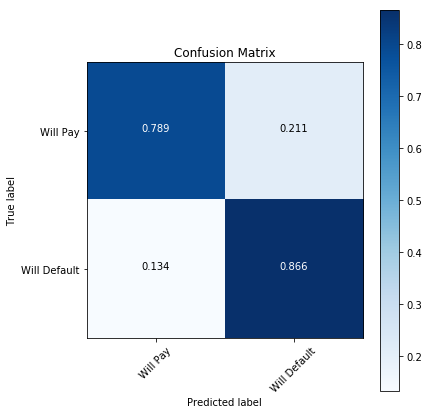

In [78]:
#Confusion Matrix for Decision Tree

plt.figure(figsize=(6,6))
plot_confusion_matrix(dt_model_1.predict(X_test), normalize=True)
plt.show()

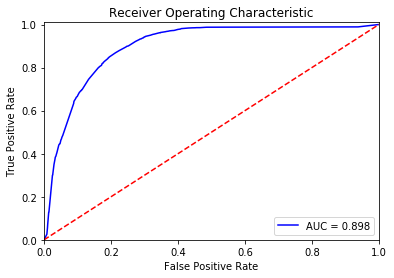

In [79]:
#ROC plot for Decision Tree
plot_roc(y_test, dt_model_1.predict_proba(X_test)[:,1], 'Decision Tree Classifier')

## PySpark

### Logistic Regression

In [80]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('pyspark_project').getOrCreate()

In [81]:
from pyspark.ml.feature import RFormula
import pyspark.sql.types as types 

data = spark.read.format("csv").option("header",True).option("inferschema",True).load("final_data.csv")
data.show(2)

+--------+----------+-----+-----------+--------------+--------+-------+----------+-------------+---------------+--------------------+-------+--------------------+---------------------+--------------+--------------------+---------------------+---------+---------+------------------+---+---+---+---+---+---+---+--------+---+----+-----------+
|int_rate|emp_length|  dti|delinq_2yrs|inq_last_6mths|open_acc|pub_rec|revol_util|total_rec_int|last_pymnt_amnt|acc_open_past_24mths|bc_util|mo_sin_old_rev_tl_op|mo_sin_rcnt_rev_tl_op|mo_sin_rcnt_tl|mths_since_recent_bc|mths_since_recent_inq|num_bc_tl|num_il_tl|num_tl_op_past_12m|  A|  B|  C|  D|  E|  F|  G|MORTGAGE|OWN|RENT|loan_status|
+--------+----------+-----+-----------+--------------+--------+-------+----------+-------------+---------------+--------------------+-------+--------------------+---------------------+--------------+--------------------+---------------------+---------+---------+------------------+---+---+---+---+---+---+---+--------+--

In [ ]:
#data.printSchema()

In [82]:
prediction = RFormula(formula = "loan_status ~ .") 

fitted_rf = prediction.fit(data) 
prepared_df = fitted_rf.transform(data) 

(train, test) = prepared_df.randomSplit((0.7, 0.3))
train.show(2)

+--------+----------+-----+-----------+--------------+--------+-------+----------+-------------+---------------+--------------------+-------+--------------------+---------------------+--------------+--------------------+---------------------+---------+---------+------------------+---+---+---+---+---+---+---+--------+---+----+-----------+--------------------+-----+
|int_rate|emp_length|  dti|delinq_2yrs|inq_last_6mths|open_acc|pub_rec|revol_util|total_rec_int|last_pymnt_amnt|acc_open_past_24mths|bc_util|mo_sin_old_rev_tl_op|mo_sin_rcnt_rev_tl_op|mo_sin_rcnt_tl|mths_since_recent_bc|mths_since_recent_inq|num_bc_tl|num_il_tl|num_tl_op_past_12m|  A|  B|  C|  D|  E|  F|  G|MORTGAGE|OWN|RENT|loan_status|            features|label|
+--------+----------+-----+-----------+--------------+--------+-------+----------+-------------+---------------+--------------------+-------+--------------------+---------------------+--------------+--------------------+---------------------+---------+---------+----

In [84]:
from pyspark.ml.classification import LogisticRegression 

# Create initial LogisticRegression model
lr = LogisticRegression()

# Train model with Training Data
lr_model = lr.fit(train)
#print("Coefficients: " + str(lr_model.coefficients))

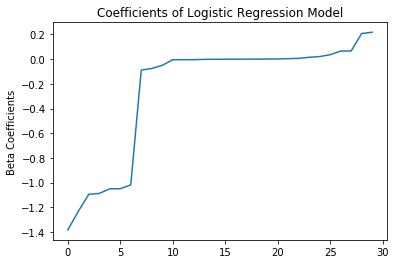

In [85]:
#Plotting Coefficients using using LogisticRegressionModel’s attributes.

import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lr_model.coefficients)

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.title('Coefficients of Logistic Regression Model')
plt.show()

In [86]:
print("Intercept: " + str(lr_model.intercept))

Intercept: -0.899246894402098


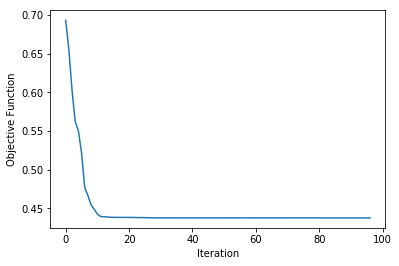

In [87]:
# Extract the summary from the returned LogisticRegressionModel instance trained
trainingSummary = lr_model.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
plt.plot(objectiveHistory)
plt.ylabel('Objective Function')
plt.xlabel('Iteration')
plt.show()

I want to plot roc and precision recall curve. For some reason, trainingSummary.roc.toPandas() and  trainingSummary.pr.toPandas() are not working in my laptop. So, I downloaded spark dataframe of roc and precision-recall as csv file to my local machine and then read from there to plot the roc and precision-recall curve.

In [88]:
roc = trainingSummary.roc
pr = trainingSummary.pr

In [89]:
roc.write.format("csv").save('roc_', header=True)
pr.write.format("csv").save('pr', header=True)

In [90]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\User\\Desktop\\CS-BigData\\LoanStats3b.csv'

In [91]:
import os
import glob
files  = [i for i in glob.glob('./roc_/*-{}'.format('*.csv'))]
files2 = [i for i in glob.glob('./pr/*-{}'.format('*.csv'))]

In [92]:
import pandas as pd
combined_csv1 = pd.concat([pd.read_csv(f) for f in files ])
combined_csv2 = pd.concat([pd.read_csv(f) for f in files2 ])

In [93]:
#export to csv
combined_csv1.to_csv("roc.csv", index=False, header=True, encoding='utf-8-sig')
combined_csv2.to_csv("pr.csv", index=False, header=True, encoding='utf-8-sig')

In [94]:
roc_ = pd.read_csv('roc.csv')
pr_ = pd.read_csv('pr.csv')

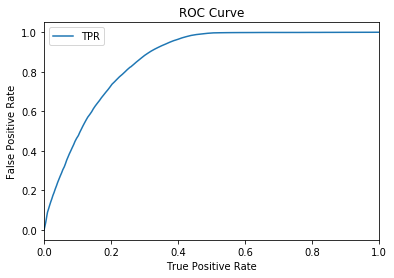

Training set areaUnderROC: 0.8600515212076042


In [95]:
#ROC curve of Training set
roc_.plot(x='FPR', y='TPR')
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

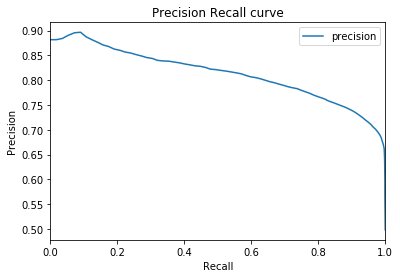

In [96]:
#Precision Recall curve of Training set
pr_.plot(x='recall', y='precision')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision Recall curve')
plt.show()

In [97]:
# Make predictions on test data using the transform() method.
# LogisticRegression.transform() will only use the 'features' column.

predictions = lr_model.transform(test)

In [98]:
import pandas as pd
pd.DataFrame(predictions.take(3), columns=predictions.columns).transpose()

,0,1,2
int_rate,6,6,6
emp_length,4,5,10
dti,17.28,9.85,24.49
delinq_2yrs,0,0,0
inq_last_6mths,2,1,0
open_acc,25,18,10
pub_rec,0,0,0
revol_util,33.4,12.6,98.5
total_rec_int,1344.66,3984.79,14863.9
last_pymnt_amnt,1937.85,2647.77,1556.32


In [99]:
# Evaluate our Logistic Regression model
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8642773463892178


### Decision Tree Classifier

In [100]:
from pyspark.ml.classification import DecisionTreeClassifier

# Create initial Decision Tree model
tree = DecisionTreeClassifier() 

# Train model with Training Data
dt_model = tree.fit(train)

# Make predictions on test data using the transform() method.
predictions = dt_model.transform(test)

# Evaluate model
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8428011039729167


### Random Forest Classifier

In [101]:
from pyspark.ml.classification import RandomForestClassifier

# Create initial Random Forest model
rf = RandomForestClassifier()

# Train model with Training Data
rf_model = rf.fit(train)

# Make predictions on test data using the transform() method.
predictions = rf_model.transform(test)

# Evaluate model
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8662475361106622


### Gradient Boosted Tree Classifier

In [102]:
from pyspark.ml.classification import GBTClassifier

# Create initial Gradient Boosted Tree model model
gbt = GBTClassifier(maxIter=10)

# Train model with Training Data
gbtModel = gbt.fit(train)

# Make predictions on test data using the transform() method.
predictions = gbtModel.transform(test)

# Evaluate Test data
evaluator = BinaryClassificationEvaluator()

# Test set Area under the curve
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8975940275353642


In [103]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())

#5-fold CrossValidator
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train)

# Use test set to measure the accuracy of our model on new data
predictions = cvModel.transform(test)

# Evaluate best model
evaluator.evaluate(predictions)

0.9118826450328278